In [59]:
import json
import csv
import os
import scipy.fft
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from pandas import DataFrame
from scipy.signal import find_peaks
from scipy.signal import butter, lfilter, filtfilt, savgol_filter
#try
from detecta import detect_peaks
from scipy.signal import savgol_filter
from scipy import stats
from scipy import integrate

In [60]:
def myfft(y):
    N = len(y)
    T = 1.0 / 100.0
    x = np.linspace(0.0, N*T, N)
    y_f = scipy.fft.fft(y)
    x_f = np.linspace(0.0, 1.0/(2.0*T), N//2)
    #plt.plot(x_f, 2.0/N * np.abs(y_f[:N//2]))
    #plt.show()
    return x_f,2.0/N * np.abs(y_f[:N//2])
def low_pass_filter(x, cutoff, fs, order,type='float'):
    if type == 'str':
        x = [float(dx) for dx in x]
    nyquist = fs / 2
    b, a = butter(order, cutoff / nyquist)

    filtered = filtfilt(b, a, x, method='gust')
    if type == 'str':
        return [str(s) for s in filtered]
    else:
        return filtered
def NormaliseCrossCorrelation(a,v):
    M = len(a)
    N = len(v)

    if type(a) is list: 
        a = np.array(a)
    if type(v) is list: 
        v = np.array(v)
    
    v_mu = np.mean(v)
    # print(M-N+1)
    ncc_series = []
    for i in range(M-N+1):
        _a = a[i:i+N]
        a_sum = _a - np.mean(_a)
        v_sum = v - v_mu
        nr = 1/N * np.sum(a_sum*v_sum) / np.sqrt(np.var(_a)*np.var(v)) +1
        ncc_series.append(nr)

    return ncc_series

def MAE(preds, targets):
    preds = np.array(preds)
    targets = np.array(targets)
    return np.sum(np.abs(preds-targets)) / targets.size

def MSE(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

def MAPE(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [101]:
# origin_path = './c.台南立人里/投稿版本_data/低衰/'
# all_file_name = os.listdir(origin_path)
# # for _ in all_file_name:
# #     filename = _.split('.')[1]
# #     if filename != 'json':all_file_name.remove(f'{_}')

# print(len(all_file_name))
# path_1 = all_file_name[0]
# path_2 = all_file_name[1]
# print(path_1,path_2)
# filename = origin_path.split('/')
# filename = filename[-1]
# print(filename)


16
102003.json 102005.json



./c.台南立人里/投稿版本_data/低衰//102003.json
try_peak= [277 371 465 559 650 741 833 924]
try_peak= [224 324 416 511 604 693 784 879 955]
length： 365


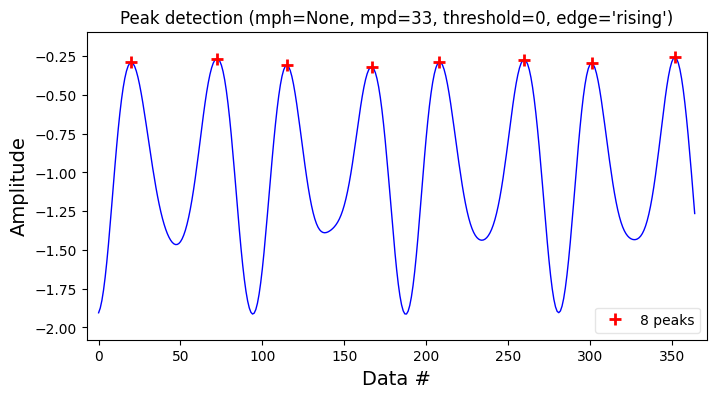

left 下面積1為： 48.42329919564976
left 下面積2為： 45.82668390052509
left 下面積3為： 48.995410460793785
left 下面積4為： 44.3343921666136
left 下面積5為： 48.53628261948305
left 下面積6為： 43.55762145933402
left 下面積7為： 48.71077858062654
left 下面積8為： 6.303987290717647
第一次數據NCC曲線下面積(LR)： [48.42329919564976, 45.82668390052509, 48.995410460793785, 44.3343921666136, 48.53628261948305, 43.55762145933402, 48.71077858062654, 6.303987290717647]


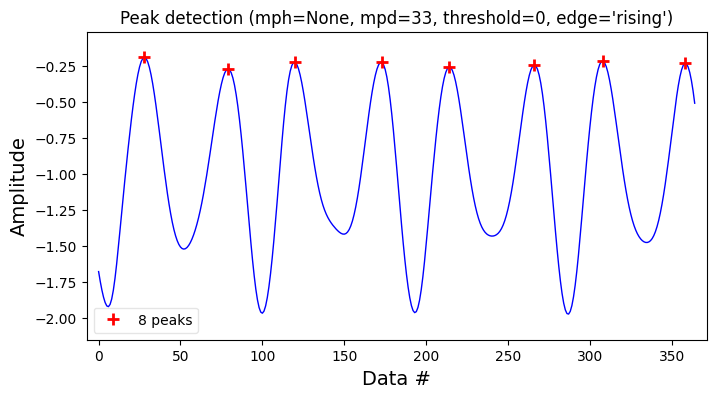

left 下面積1為： 47.40357345341826
left 下面積2為： 45.0533876260652
left 下面積3為： 49.395445009227316
left 下面積4為： 43.79429727160657
left 下面積5為： 48.35025152357687
left 下面積6為： 43.97870187509099
left 下面積7為： 47.77601149696913
left 下面積8為： 4.137178789155467
第一次數據NCC曲線下面積(LR)： [47.40357345341826, 45.0533876260652, 49.395445009227316, 43.79429727160657, 48.35025152357687, 43.97870187509099, 47.77601149696913, 4.137178789155467]
./c.台南立人里/投稿版本_data/低衰//102005.json
try_peak= [109 202 296 387 479 573 668]
try_peak= [ 56 155 250 342 436 529 624]
length： 366


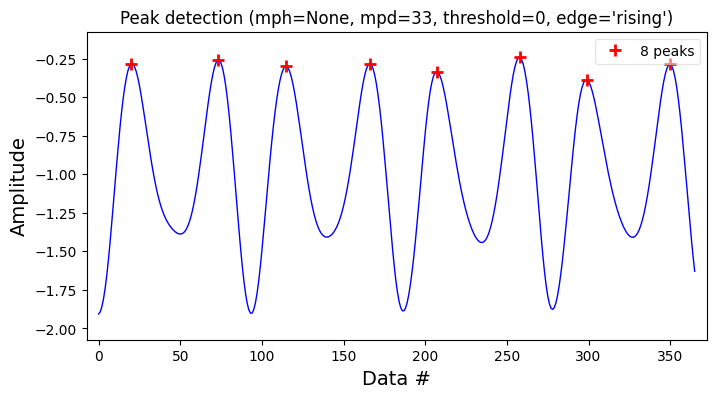

left 下面積1為： 49.24709166070955
left 下面積2為： 43.55562913003002
left 下面積3為： 47.720239994881446
left 下面積4為： 44.048542758993456
left 下面積5為： 47.375420698144396
left 下面積6為： 43.59496417444887
left 下面積7為： 47.84570580874421
left 下面積8為： 10.921332673390502
第一次數據NCC曲線下面積(LR)： [49.24709166070955, 43.55562913003002, 47.720239994881446, 44.048542758993456, 47.375420698144396, 43.59496417444887, 47.84570580874421, 10.921332673390502]


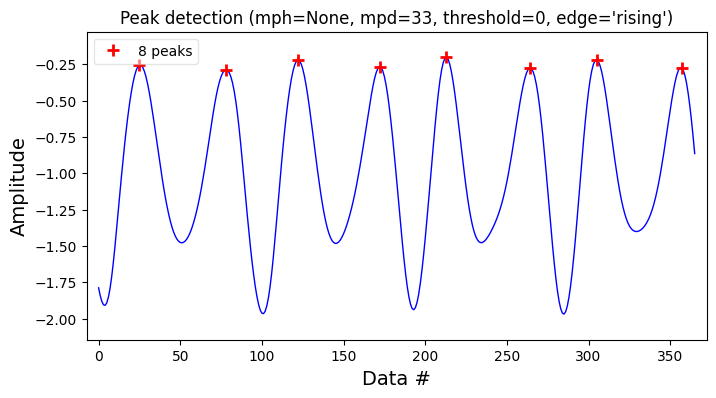

left 下面積1為： 49.03950911288649
left 下面積2為： 44.59634042796813
left 下面積3為： 46.870301684014876
left 下面積4為： 44.0574094818958
left 下面積5為： 46.79495816861997
left 下面積6為： 44.07022902192852
left 下面積7為： 47.7471297158527
left 下面積8為： 7.861290236809404
第一次數據NCC曲線下面積(LR)： [49.03950911288649, 44.59634042796813, 46.870301684014876, 44.0574094818958, 46.79495816861997, 44.07022902192852, 47.7471297158527, 7.861290236809404]
./c.台南立人里/投稿版本_data/低衰//102007.json
try_peak= [271 362 452 539 630 724 820]
try_peak= [225 318 408 497 586 678 773]
length： 360


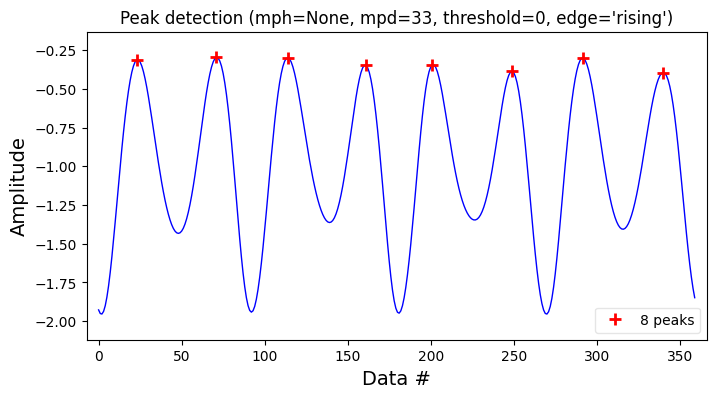

left 下面積1為： 43.147013878862886
left 下面積2為： 46.09379970798979
left 下面積3為： 41.234238249489884
left 下面積4為： 45.31253139305017
left 下面積5為： 43.448059880481416
left 下面積6為： 47.472181984514144
left 下面積7為： 43.600354954470575
left 下面積8為： 17.205858308788752
第一次數據NCC曲線下面積(LR)： [43.147013878862886, 46.09379970798979, 41.234238249489884, 45.31253139305017, 43.448059880481416, 47.472181984514144, 43.600354954470575, 17.205858308788752]


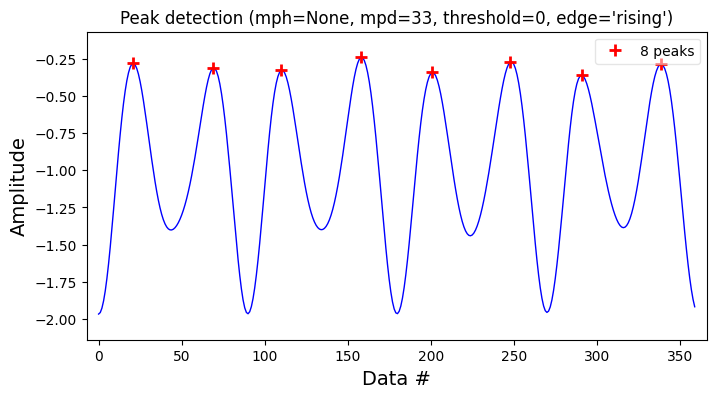

left 下面積1為： 43.14655140647682
left 下面積2為： 45.2489104344878
left 下面積3為： 41.41212319207077
left 下面積4為： 46.398276120862036
left 下面積5為： 43.0453089172357
left 下面積6為： 47.55243939389207
left 下面積7為： 43.49467408317945
left 下面積8為： 17.603522450648175
第一次數據NCC曲線下面積(LR)： [43.14655140647682, 45.2489104344878, 41.41212319207077, 46.398276120862036, 43.0453089172357, 47.55243939389207, 43.49467408317945, 17.603522450648175]
./c.台南立人里/投稿版本_data/低衰//102009.json
try_peak= [303 415 532 642 751 864 975]
try_peak= [ 240  359  475  587  698  807  918 1035]
length： 443


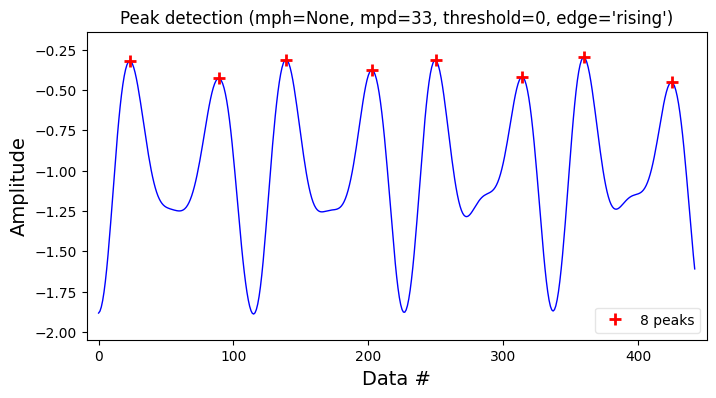

left 下面積1為： 60.402465357479876
left 下面積2為： 54.874817324164376
left 下面積3為： 58.92053338811933
left 下面積4為： 50.84145521370005
left 下面積5為： 59.4629537913184
left 下面積6為： 49.66948380853404
left 下面積7為： 59.53725927372702
left 下面積8為： 13.669629831111036
第一次數據NCC曲線下面積(LR)： [60.402465357479876, 54.874817324164376, 58.92053338811933, 50.84145521370005, 59.4629537913184, 49.66948380853404, 59.53725927372702, 13.669629831111036]


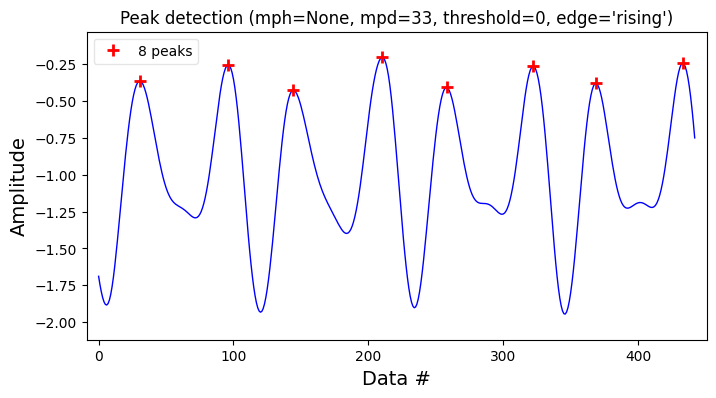

left 下面積1為： 60.39436213093653
left 下面積2為： 53.119152259380506
left 下面積3為： 60.202185387916785
left 下面積4為： 50.81913170591696
left 下面積5為： 59.832967293352475
left 下面積6為： 49.089848035939156
left 下面積7為： 59.74532726443107
left 下面積8為： 9.14767946427352
第一次數據NCC曲線下面積(LR)： [60.39436213093653, 53.119152259380506, 60.202185387916785, 50.81913170591696, 59.832967293352475, 49.089848035939156, 59.74532726443107, 9.14767946427352]
./c.台南立人里/投稿版本_data/低衰//102013.json
try_peak= [ 260  371  475  580  683  788  892 1002]
try_peak= [312 418 528 630 733 839 945]
length： 417


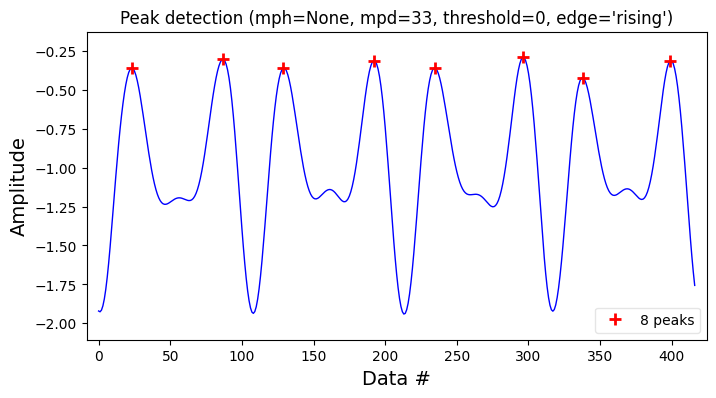

left 下面積1為： 58.85715101412378
left 下面積2為： 46.12254443282299
left 下面積3為： 58.147866198070645
left 下面積4為： 46.73903652399454
left 下面積5為： 56.511186853951436
left 下面積6為： 45.793286516637394
left 下面積7為： 56.82434397154877
left 下面積8為： 13.302425847920784
第一次數據NCC曲線下面積(LR)： [58.85715101412378, 46.12254443282299, 58.147866198070645, 46.73903652399454, 56.511186853951436, 45.793286516637394, 56.82434397154877, 13.302425847920784]


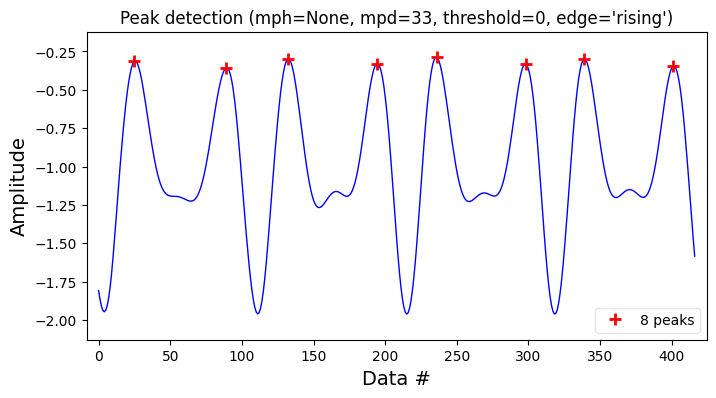

left 下面積1為： 58.73834387167337
left 下面積2為： 46.58438142711158
left 下面積3為： 57.659738561473496
left 下面積4為： 46.46022019852877
left 下面積5為： 56.737224743738764
left 下面積6為： 45.61978019593582
left 下面積7為： 57.02871893677718
left 下面積8為： 12.664938657836947
第一次數據NCC曲線下面積(LR)： [58.73834387167337, 46.58438142711158, 57.659738561473496, 46.46022019852877, 56.737224743738764, 45.61978019593582, 57.02871893677718, 12.664938657836947]
./c.台南立人里/投稿版本_data/低衰//102714.json
try_peak= [264 362 456 548 641 735 832]
try_peak= [215 314 409 503 596 689 785 883]
length： 373


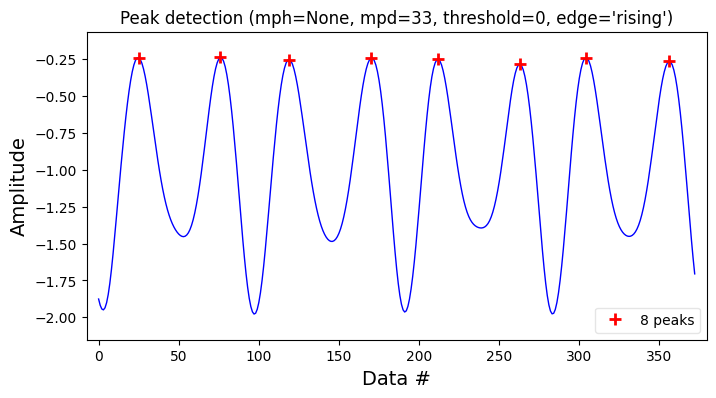

left 下面積1為： 47.74750662097873
left 下面積2為： 45.74229706794567
left 下面積3為： 48.00432564951215
left 下面積4為： 44.033586859436134
left 下面積5為： 47.60349912009047
left 下面積6為： 44.404206980238186
left 下面積7為： 48.83841910635858
left 下面積8為： 11.400487016814969
第一次數據NCC曲線下面積(LR)： [47.74750662097873, 45.74229706794567, 48.00432564951215, 44.033586859436134, 47.60349912009047, 44.404206980238186, 48.83841910635858, 11.400487016814969]


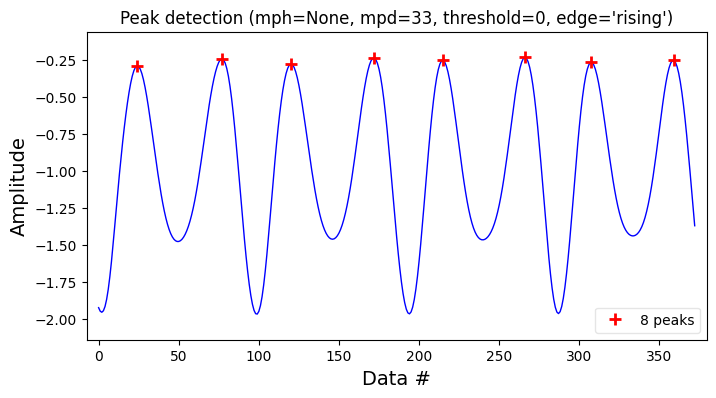

left 下面積1為： 48.228657368764196
left 下面積2為： 45.75643458587425
left 下面積3為： 48.237952036193626
left 下面積4為： 44.32281582691661
left 下面積5為： 47.64806273052778
left 下面積6為： 44.20221223128047
left 下面積7為： 48.879562717285715
left 下面積8為： 10.5513677073345
第一次數據NCC曲線下面積(LR)： [48.228657368764196, 45.75643458587425, 48.237952036193626, 44.32281582691661, 47.64806273052778, 44.20221223128047, 48.879562717285715, 10.5513677073345]
./c.台南立人里/投稿版本_data/低衰//102715.json
try_peak= [272 371 471 574 675 782]
try_peak= [217 322 424 524 627 729 847]
length： 404


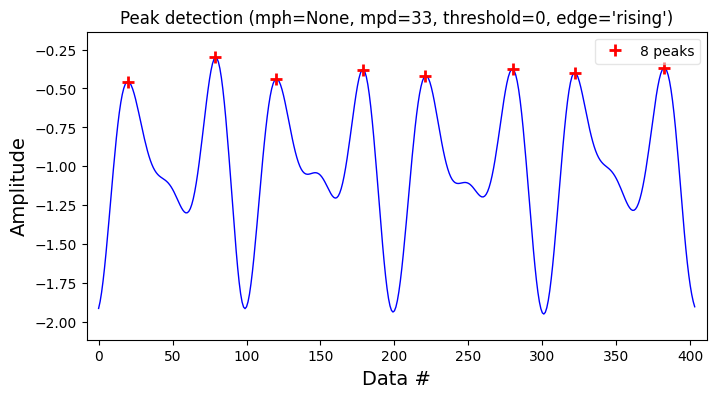

left 下面積1為： 54.10840988709931
left 下面積2為： 45.03742122746478
left 下面積3為： 52.212067247625626
left 下面積4為： 48.30569059476345
left 下面積5為： 52.864932474796085
left 下面積6為： 48.04737842511577
left 下面積7為： 53.983269751304
left 下面積8為： 20.5141506274468
第一次數據NCC曲線下面積(LR)： [54.10840988709931, 45.03742122746478, 52.212067247625626, 48.30569059476345, 52.864932474796085, 48.04737842511577, 53.983269751304, 20.5141506274468]


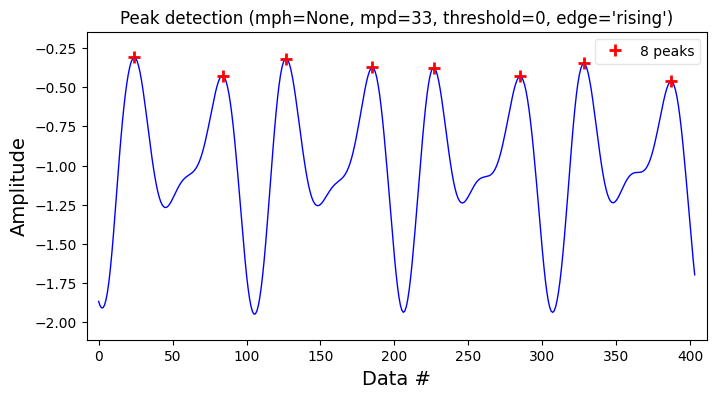

left 下面積1為： 53.85101613094492
left 下面積2為： 46.5734121700919
left 下面積3為： 51.376550958246796
left 下面積4為： 48.025828509818474
left 下面積5為： 52.08934315380735
left 下面積6為： 48.454186429788265
left 下面積7為： 53.132974855381406
left 下面積8為： 18.45545607739451
第一次數據NCC曲線下面積(LR)： [53.85101613094492, 46.5734121700919, 51.376550958246796, 48.025828509818474, 52.08934315380735, 48.454186429788265, 53.132974855381406, 18.45545607739451]
./c.台南立人里/投稿版本_data/低衰//102716.json
try_peak= [280 378 473 567 668 767]
try_peak= [231 328 423 520 614 716 818]
length： 384


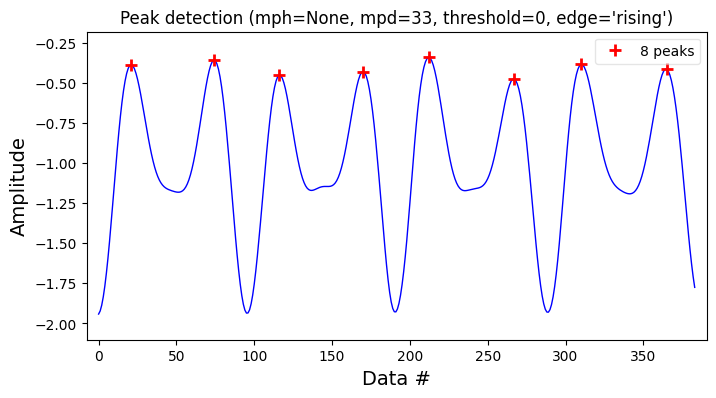

left 下面積1為： 46.24268695021817
left 下面積2為： 47.82030807823261
left 下面積3為： 48.757265684518636
left 下面積4為： 46.96572681493013
left 下面積5為： 48.32042939952428
left 下面積6為： 49.48665548030676
left 下面積7為： 47.744900527707394
left 下面積8為： 15.999448067376983
第一次數據NCC曲線下面積(LR)： [46.24268695021817, 47.82030807823261, 48.757265684518636, 46.96572681493013, 48.32042939952428, 49.48665548030676, 47.744900527707394, 15.999448067376983]


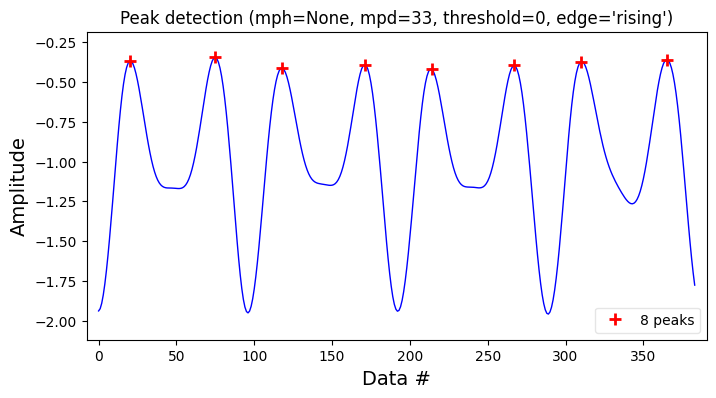

left 下面積1為： 46.99450003661247
left 下面積2為： 48.3695114704216
left 下面積3為： 48.27422242593075
left 下面積4為： 47.220313809109086
left 下面積5為： 47.62433617891471
left 下面積6為： 49.48665548030676
left 下面積7為： 47.744900527707394
left 下面積8為： 15.999448067376983
第一次數據NCC曲線下面積(LR)： [46.99450003661247, 48.3695114704216, 48.27422242593075, 47.220313809109086, 47.62433617891471, 49.48665548030676, 47.744900527707394, 15.999448067376983]
./c.台南立人里/投稿版本_data/低衰//102717.json
try_peak= [175 285 382 477 574 670]
try_peak= [232 332 426 522 620 719]
length： 378


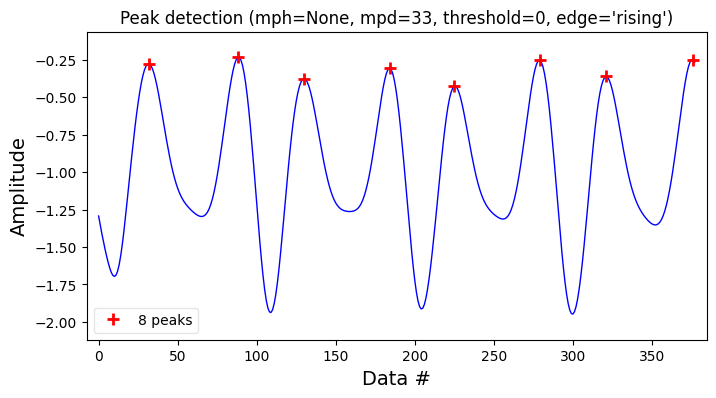

left 下面積1為： 49.86135791731878
left 下面積2為： 44.44102850232006
left 下面積3為： 49.07192699689229
left 下面積4為： 45.71305466347977
left 下面積5為： 49.68527436181474
left 下面積6為： 46.300727767331566
left 下面積7為： 50.51708388475327
left 下面積8為： 0.0
第一次數據NCC曲線下面積(LR)： [49.86135791731878, 44.44102850232006, 49.07192699689229, 45.71305466347977, 49.68527436181474, 46.300727767331566, 50.51708388475327, 0.0]


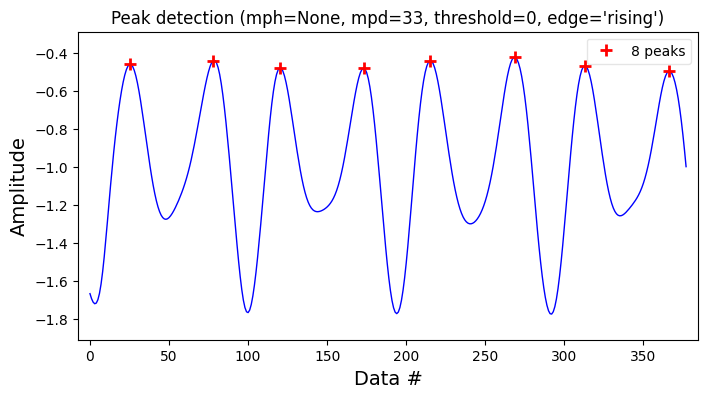

left 下面積1為： 47.0912055779144
left 下面積2為： 42.71101643882664
left 下面積3為： 48.093408261624006
left 下面積4為： 44.30061713644716
left 下面積5為： 51.306241640898286
left 下面積6為： 46.282714550565025
left 下面積7為： 49.665783632375074
left 下面積8為： 4.385823372416073
第一次數據NCC曲線下面積(LR)： [47.0912055779144, 42.71101643882664, 48.093408261624006, 44.30061713644716, 51.306241640898286, 46.282714550565025, 49.665783632375074, 4.385823372416073]
./c.台南立人里/投稿版本_data/低衰//102718.json
try_peak= [283 371 457 544 633 722 808 902]
try_peak= [241 331 417 501 590 679 767 857 953]
length： 349


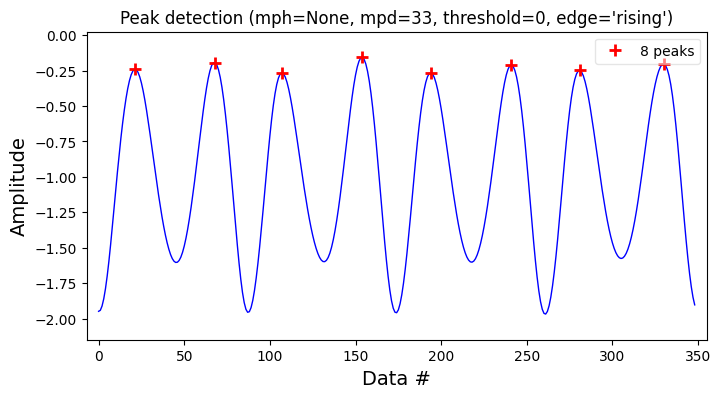

left 下面積1為： 43.892306753428954
left 下面積2為： 41.49056333871243
left 下面積3為： 44.418443284926816
left 下面積4為： 41.96936238490519
left 下面積5為： 45.11001324119763
left 下面積6為： 42.335995411439185
left 下面積7為： 45.8751071822487
left 下面積8為： 15.342593504707748
第一次數據NCC曲線下面積(LR)： [43.892306753428954, 41.49056333871243, 44.418443284926816, 41.96936238490519, 45.11001324119763, 42.335995411439185, 45.8751071822487, 15.342593504707748]


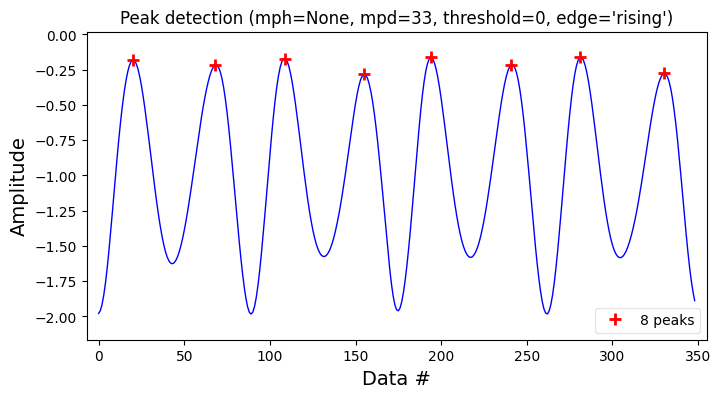

left 下面積1為： 44.13918928298714
left 下面積2為： 42.02984189460615
left 下面積3為： 44.0233980577261
left 下面積4為： 41.80576974754268
left 下面積5為： 45.11001324119763
left 下面積6為： 42.335995411439185
left 下面積7為： 45.8751071822487
left 下面積8為： 15.342593504707748
第一次數據NCC曲線下面積(LR)： [44.13918928298714, 42.02984189460615, 44.0233980577261, 41.80576974754268, 45.11001324119763, 42.335995411439185, 45.8751071822487, 15.342593504707748]
./c.台南立人里/投稿版本_data/低衰//102719.json
try_peak= [238 335 429 522 614 708]
try_peak= [192 283 380 475 568 658 756]
length： 370


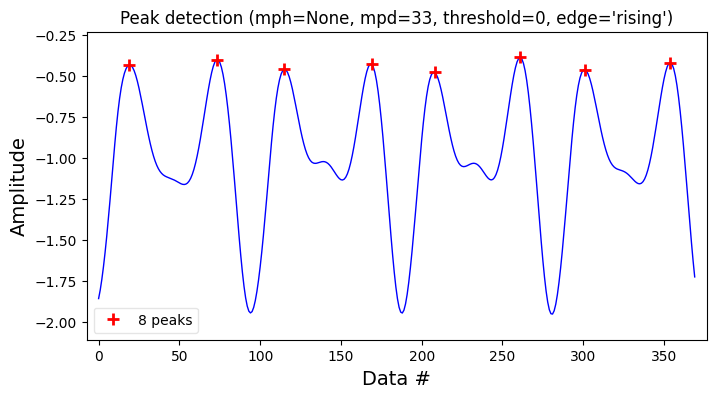

left 下面積1為： 47.34701866282979
left 下面積2為： 47.999209269594985
left 下面積3為： 46.57182372162602
left 下面積4為： 45.00962836417487
left 下面積5為： 46.27365061345509
left 下面積6為： 45.68126557469726
left 下面積7為： 46.52921742789291
left 下面積8為： 12.40207360615679
第一次數據NCC曲線下面積(LR)： [47.34701866282979, 47.999209269594985, 46.57182372162602, 45.00962836417487, 46.27365061345509, 45.68126557469726, 46.52921742789291, 12.40207360615679]


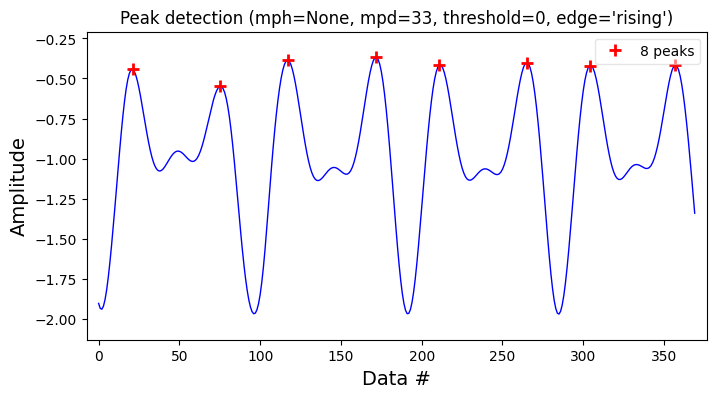

left 下面積1為： 47.2815713093139
left 下面積2為： 48.11261368219329
left 下面積3為： 46.96302168425015
left 下面積4為： 45.07350315791064
left 下面積5為： 46.396524115394975
left 下面積6為： 45.34619301904191
left 下面積7為： 46.371083332280044
left 下面積8為： 11.063297502268222
第一次數據NCC曲線下面積(LR)： [47.2815713093139, 48.11261368219329, 46.96302168425015, 45.07350315791064, 46.396524115394975, 45.34619301904191, 46.371083332280044, 11.063297502268222]
./c.台南立人里/投稿版本_data/低衰//102721.json
try_peak= [198 286 370 450 532 613 698 782]
try_peak= [242 327 410 492 572 655 743]
length： 326


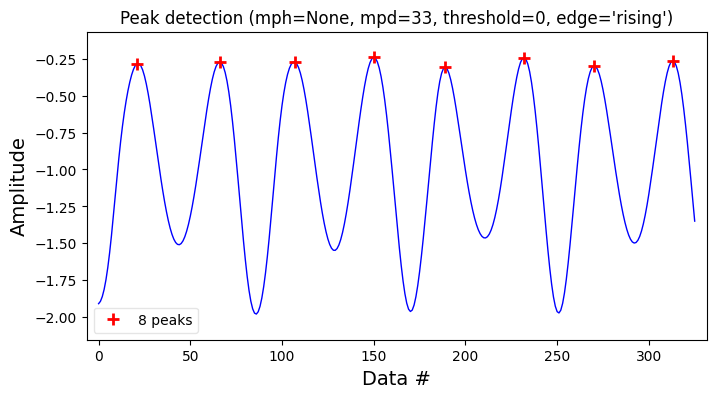

left 下面積1為： 40.90949884180879
left 下面積2為： 43.752331328111666
left 下面積3為： 39.44013995818206
left 下面積4為： 42.25942184746998
left 下面積5為： 39.26603384845966
left 下面積6為： 40.959706230318346
left 下面積7為： 39.17129680463086
left 下面積8為： 6.690386279349703
第一次數據NCC曲線下面積(LR)： [40.90949884180879, 43.752331328111666, 39.44013995818206, 42.25942184746998, 39.26603384845966, 40.959706230318346, 39.17129680463086, 6.690386279349703]


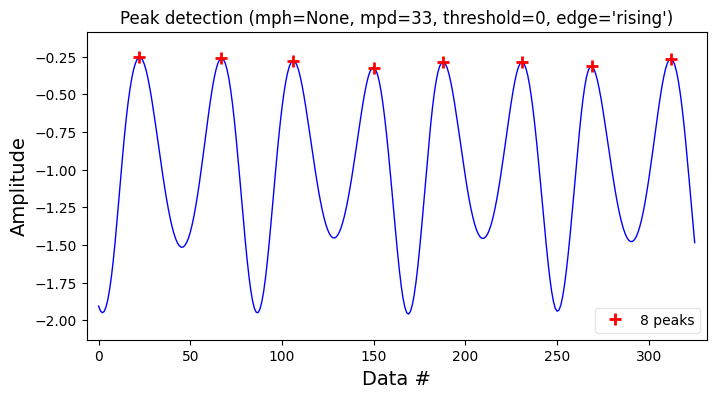

left 下面積1為： 40.902086459476656
left 下面積2為： 43.19571728218374
left 下面積3為： 39.71323985675577
left 下面積4為： 41.926421968685744
left 下面積5為： 39.31469928182213
left 下面積6為： 40.88101215639865
left 下面積7為： 39.187700400046374
left 下面積8為： 6.95969615703614
第一次數據NCC曲線下面積(LR)： [40.902086459476656, 43.19571728218374, 39.71323985675577, 41.926421968685744, 39.31469928182213, 40.88101215639865, 39.187700400046374, 6.95969615703614]
./c.台南立人里/投稿版本_data/低衰//102723.json
try_peak= [241 325 405 481 555 622 736]
try_peak= [200 284 365 445 519 590 651]
length： 298


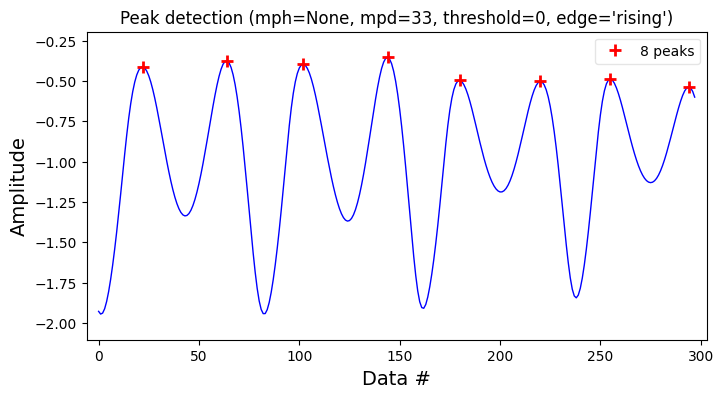

left 下面積1為： 36.81524038946038
left 下面積2為： 42.55622396722953
left 下面積3為： 37.292160604981134
left 下面積4為： 39.99211283625203
left 下面積5為： 34.28345643346685
left 下面積6為： 38.65385889755399
left 下面積7為： 32.51047601010401
left 下面積8為： 1.096656538189993
第一次數據NCC曲線下面積(LR)： [36.81524038946038, 42.55622396722953, 37.292160604981134, 39.99211283625203, 34.28345643346685, 38.65385889755399, 32.51047601010401, 1.096656538189993]


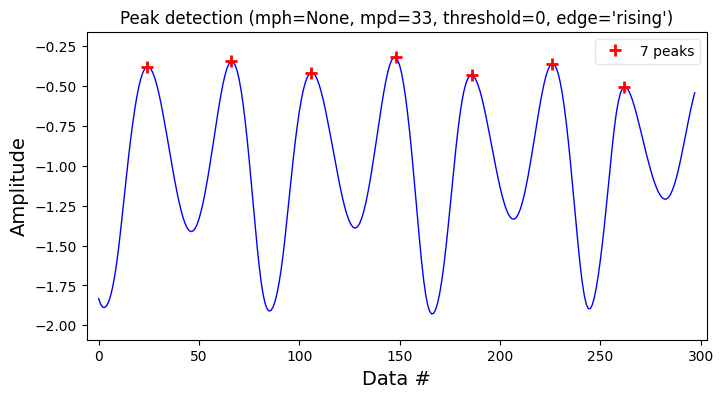

left 下面積1為： 36.72717177874051
left 下面積2為： 43.42201865656598
left 下面積3為： 37.08589215204542
left 下面積4為： 41.59244351432789
left 下面積5為： 34.17567085239304
left 下面積6為： 39.01766824142993
left 下面積7為： 30.127788560595526
第一次數據NCC曲線下面積(LR)： [36.72717177874051, 43.42201865656598, 37.08589215204542, 41.59244351432789, 34.17567085239304, 39.01766824142993, 30.127788560595526]
./c.台南立人里/投稿版本_data/低衰//102724.json
try_peak= [266 370 469 568 670 771]
try_peak= [208 323 421 521 621 721 821]
length： 391


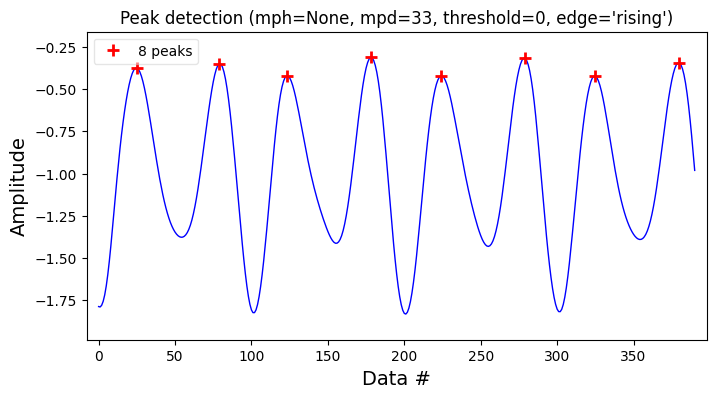

left 下面積1為： 50.36479603416747
left 下面積2為： 47.32202858507452
left 下面積3為： 51.242809027491916
left 下面積4為： 48.9850480546908
left 下面積5為： 50.67599068352914
left 下面積6為： 49.210388713938144
left 下面積7為： 51.84155857494456
left 下面積8為： 4.809818027569725
第一次數據NCC曲線下面積(LR)： [50.36479603416747, 47.32202858507452, 51.242809027491916, 48.9850480546908, 50.67599068352914, 49.210388713938144, 51.84155857494456, 4.809818027569725]


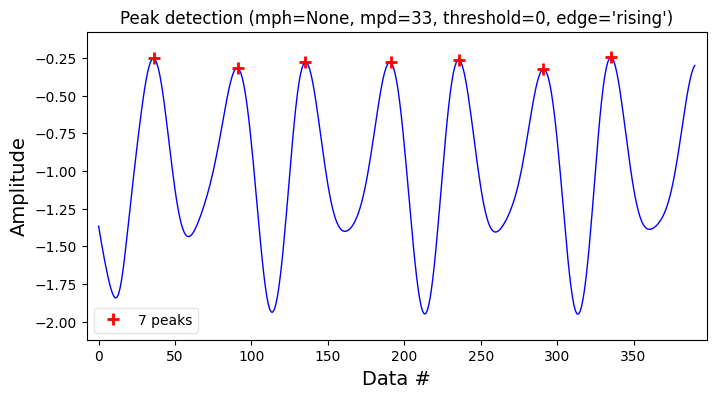

left 下面積1為： 51.1135800343425
left 下面積2為： 46.42334443027237
left 下面積3為： 51.655964381613884
left 下面積4為： 47.296430435449054
left 下面積5為： 50.66449608490854
left 下面積6為： 46.99027144649063
left 下面積7為： 51.21938168210964
第一次數據NCC曲線下面積(LR)： [51.1135800343425, 46.42334443027237, 51.655964381613884, 47.296430435449054, 50.66449608490854, 46.99027144649063, 51.21938168210964]
./c.台南立人里/投稿版本_data/低衰//111027.json
try_peak= [263 366 466 570 673 790]
try_peak= [211 318 416 518 622 728]
length： 401


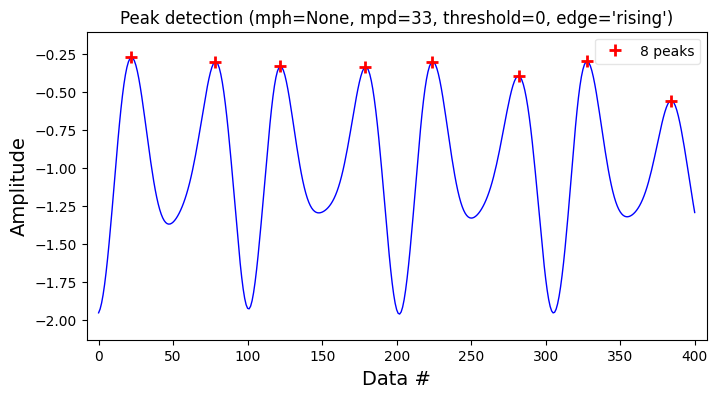

left 下面積1為： 50.88104581955364
left 下面積2為： 47.37005276053845
left 下面積3為： 51.948908601229036
left 下面積4為： 49.5282533001371
left 下面積5為： 52.44675596216269
left 下面積6為： 51.467170490597034
left 下面積7為： 53.0444111523233
left 下面積8為： 12.26606598021413
第一次數據NCC曲線下面積(LR)： [50.88104581955364, 47.37005276053845, 51.948908601229036, 49.5282533001371, 52.44675596216269, 51.467170490597034, 53.0444111523233, 12.26606598021413]


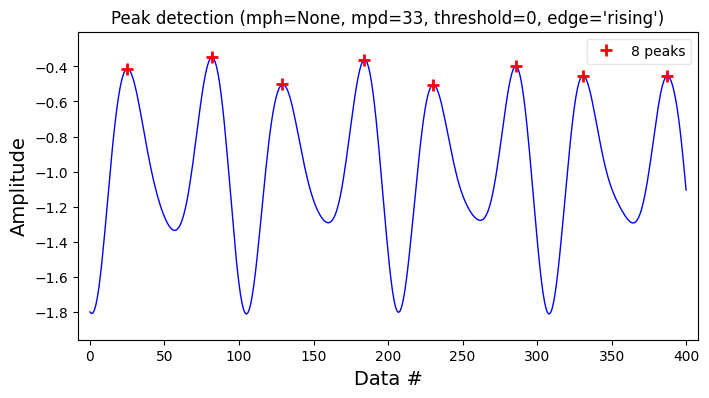

left 下面積1為： 51.261369303592566
left 下面積2為： 48.8451628027126
left 下面積3為： 50.73978291059056
left 下面積4為： 49.6373496131277
left 下面積5為： 51.91759059014717
left 下面積6為： 50.67243188350766
left 下面積7為： 53.75664404274037
left 下面積8為： 10.557391978263968
第一次數據NCC曲線下面積(LR)： [51.261369303592566, 48.8451628027126, 50.73978291059056, 49.6373496131277, 51.91759059014717, 50.67243188350766, 53.75664404274037, 10.557391978263968]
./c.台南立人里/投稿版本_data/低衰//111029.json
try_peak= [298 391 484 573 664 754 839]
try_peak= [247 346 437 528 618 710 796]
length： 358


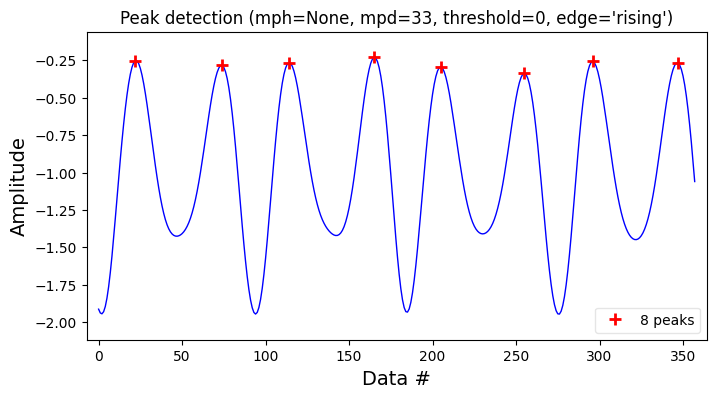

left 下面積1為： 47.959371533815464
left 下面積2為： 43.35411079382542
left 下面積3為： 47.32136861040312
left 下面積4為： 41.76887537764507
left 下面積5為： 47.09729016175436
left 下面積6為： 44.71325750565079
left 下面積7為： 47.207050554395565
left 下面積8為： 4.511496134228383
第一次數據NCC曲線下面積(LR)： [47.959371533815464, 43.35411079382542, 47.32136861040312, 41.76887537764507, 47.09729016175436, 44.71325750565079, 47.207050554395565, 4.511496134228383]


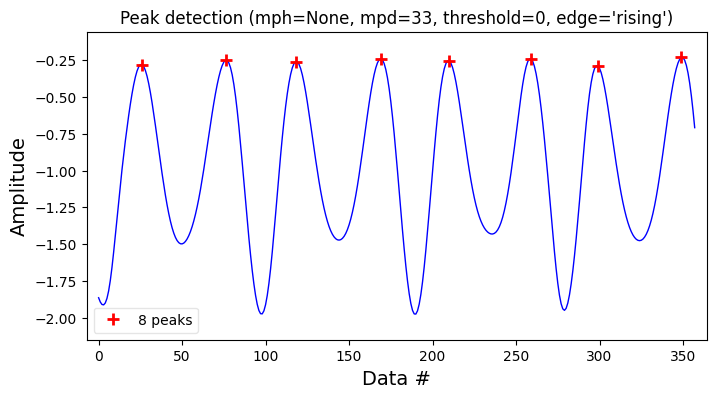

left 下面積1為： 47.403708802067534
left 下面積2為： 43.87626245046315
left 下面積3為： 47.11782015857189
left 下面積4為： 42.32827263106286
left 下面積5為： 46.7372660781766
left 下面積6為： 43.99131965510908
left 下面積7為： 46.90033508855326
left 下面積8為： 3.939519588222751
第一次數據NCC曲線下面積(LR)： [47.403708802067534, 43.87626245046315, 47.11782015857189, 42.32827263106286, 46.7372660781766, 43.99131965510908, 46.90033508855326, 3.939519588222751]


In [173]:
row_path = './c.台南立人里/投稿版本_data/低衰/'
all_file_name = os.listdir(row_path)
low_RR_mean = []
low_RR_std = []
low_LL_mean = []
low_LL_std = []
low_LR_mean = []
low_LR_std = []
low_RL_mean = []
low_RL_std = []
low_cadence = []
low_GCI = []
for _ in all_file_name:
    name = _.split('.')[0]
    path = f'{row_path}/{_}'
    print(path)
    with open(path) as file:
        once_data = json.load(file)
    once_data['LeftFootGyro']['z'] = savgol_filter(once_data['LeftFootGyro']['z'], 11, 3)
    #Left
    x = detect_peaks(once_data['LeftFootGyro']['z'][0:6000],mpd = 80 )
    a=[]
    for i in x:
        a.append(once_data['LeftFootGyro']['z'][i]) 
    # print(statistics.mean(a))
    try_peak = detect_peaks(once_data['LeftFootGyro']['z'][0:6000],mph = statistics.mean(a)-25,mpd = 60 ,kpsh=True) #,show=True
    # try_peak = try_peak[1::]    #略過第一步
    print('try_peak=',try_peak)
    once_Left_five_steps=[]
    for i in range(len(try_peak)):
        if try_peak[i+1]-try_peak[i] < 200: once_Left_five_steps.append(try_peak[i])
        if try_peak[i+1]-try_peak[i] >= 200 and len(once_Left_five_steps)<5:once_Left_five_steps=[]
        if len(once_Left_five_steps)==5: once_Left_five_steps.append(try_peak[i+1]);break 
    L_cad = (len(try_peak)-1)/((try_peak[-1]-try_peak[0])/100)*60
    L_GCI = np.mean(np.diff(try_peak))
    #Right
    once_data['RightFootGyro']['z'] = np.array(once_data['RightFootGyro']['z']) * (-1)
    once_data['RightFootGyro']['z'] = savgol_filter(once_data['RightFootGyro']['z'], 11, 3)
    x = detect_peaks(once_data['RightFootGyro']['z'][0:6000],mpd = 80 )
    a=[]
    for i in x:
        a.append(once_data['RightFootGyro']['z'][i]) 
    # print(statistics.mean(a))
    try_peak = detect_peaks(once_data['RightFootGyro']['z'][0:6000],mph = statistics.mean(a)-30,mpd = 60 ,kpsh=True) #,show=True
    # try_peak = try_peak[1::]    #略過第一步
    print('try_peak=',try_peak)
    once_Right_five_steps=[]
    for i in range(len(try_peak)):
        if try_peak[i+1]-try_peak[i] < 200: once_Right_five_steps.append(try_peak[i])
        if try_peak[i+1]-try_peak[i] >= 200 and len(once_Right_five_steps)<5:once_Right_five_steps=[]
        if len(once_Right_five_steps)==5: once_Right_five_steps.append(try_peak[i+1]);break 
    R_cad = (len(try_peak)-1)/((try_peak[-1]-try_peak[0])/100)*60
    R_GCI = np.mean(np.diff(try_peak))
    low_cadence.append((L_cad+R_cad) / 2)
    low_GCI.append((L_GCI+R_GCI)/2)
    #Left x,y,z filtering
    once_left_acc_fft_x = low_pass_filter(once_data['LeftFootAcc']['x'],3.3,80,4)
    once_left_acc_fft_y = low_pass_filter(once_data['LeftFootAcc']['y'],3.3,80,4)
    once_left_acc_fft_z = low_pass_filter(once_data['LeftFootAcc']['z'],3.3,80,4)
    #Right x,y,z filtering
    once_right_acc_fft_x = low_pass_filter(once_data['RightFootAcc']['x'],3.3,80,4)
    once_right_acc_fft_y = low_pass_filter(once_data['RightFootAcc']['y'],3.3,80,4)
    once_right_acc_fft_z = low_pass_filter(once_data['RightFootAcc']['z'],3.3,80,4)

    #訊號倒置
    once_left_acc_fft_x = np.array(once_left_acc_fft_x) * (-1)    
    once_left_acc_fft_y = np.array(once_left_acc_fft_y) * (-1)  
    once_left_acc_fft_z = np.array(once_left_acc_fft_z) * (-1)
    #RSS
    once_left_rss = np.sqrt(np.array(once_left_acc_fft_x)**2 + np.array(once_left_acc_fft_y)**2 + np.array(once_left_acc_fft_z)**2)
    once_right_rss = np.sqrt(np.array(once_right_acc_fft_x)**2 + np.array(once_right_acc_fft_y)**2 + np.array(once_right_acc_fft_z)**2)

    #left five steps
    left_five = once_left_rss[once_Left_five_steps[0]:once_Left_five_steps[-1]]
    left_t1 = once_left_rss[once_Left_five_steps[0]:once_Left_five_steps[1]]
    left_t2 = once_left_rss[once_Left_five_steps[1]:once_Left_five_steps[2]]
    left_t3 = once_left_rss[once_Left_five_steps[2]:once_Left_five_steps[3]]
    left_t4 = once_left_rss[once_Left_five_steps[3]:once_Left_five_steps[4]]
    left_t5 = once_left_rss[once_Left_five_steps[4]:once_Left_five_steps[5]]

    #right five steps
    right_five = once_right_rss[once_Right_five_steps[0]:once_Right_five_steps[-1]]    
    right_t1 = once_right_rss[once_Right_five_steps[0]:once_Right_five_steps[1]]
    right_t2 = once_right_rss[once_Right_five_steps[1]:once_Right_five_steps[2]]
    right_t3 = once_right_rss[once_Right_five_steps[2]:once_Right_five_steps[3]]
    right_t4 = once_right_rss[once_Right_five_steps[3]:once_Right_five_steps[4]]
    right_t5 = once_right_rss[once_Right_five_steps[4]:once_Right_five_steps[5]]

    once_left_five = left_five
    once_right_five = right_five    

    #left NCC(CrossCorrelation)
    length = []
    limit_length = 0    #取極限資料長度
    for i in range(5):
        a = NormaliseCrossCorrelation(once_left_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
        b = NormaliseCrossCorrelation(once_right_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
        c = NormaliseCrossCorrelation(once_left_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
        d = NormaliseCrossCorrelation(once_right_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
        length.append(len(a))
        length.append(len(b))
        length.append(len(c))
        length.append(len(d))
    limit_length = min(length)
    print('length：',limit_length)

    #LL
    LL = []
    for i in range(5):
        LL_a = NormaliseCrossCorrelation(once_left_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
        LL.append(LL_a[0:limit_length])
    LL_mean = np.mean(LL, axis=0)
    low_LL_mean.append(np.mean(LL_mean))
    low_LL_std.append(np.std(LL_mean))

    #RR
    RR = []
    for i in range(5):
        RR_a = NormaliseCrossCorrelation(once_right_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
        RR.append(RR_a[0:limit_length])
    RR_mean = np.mean(RR, axis=0)
    low_RR_mean.append(np.mean(RR_mean))
    low_RR_std.append(np.std(RR_mean))

    #LR
    LR = []
    for i in range(5):
        LR_a = NormaliseCrossCorrelation(once_left_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
        LR.append(LR_a[0:limit_length])
    LR_mean = np.mean(LR, axis=0)
    low_LR_mean.append(np.mean(LR_mean))
    low_LR_std.append(np.std(LR_mean))

    #RL
    RL = []
    for i in range(5):
        RL_a = NormaliseCrossCorrelation(once_right_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
        RL.append(RL_a[0:limit_length])
    RL_mean = np.mean(RL, axis=0)
    low_RL_mean.append(np.mean(RL_mean))
    low_RL_std.append(np.std(RL_mean))

    # plt.plot(LL_mean,label='LL')
    # plt.plot(RR_mean,label='RR')
    # plt.plot(LR_mean,label='LR')
    # plt.plot(RL_mean,label='RL')
    # plt.title(f'{name}')
    # plt.legend()
    # plt.show()

    #LR 曲線下面積
    y = detect_peaks(LR_mean*(-1),mpd = 33,show=True)
    #特殊情況(修)
    y = list(y)
    y.append(len(RL_mean)-1)
    LR_area=[]
    for _ in range(len(y)):
        try:
            x_a=np.arange(y[_],y[_+1],1)
            y_a=LR_mean[y[_]:y[_+1]]
            area = integrate.trapz(y_a, x_a)
            print(f'left 下面積{_+1}為：', area)
            LR_area.append(abs(area))
        except:break
    print('第一次數據NCC曲線下面積(LR)：',LR_area)

    #RL 曲線下面積
    y = detect_peaks(RL_mean*(-1),mpd = 33,show=True)
    #特殊情況(修)
    y = list(y)
    y.append(len(RL_mean)-1)
    RL_area=[]
    for _ in range(len(y)):
        try:
            x_a=np.arange(y[_],y[_+1],1)
            y_a=LR_mean[y[_]:y[_+1]]
            area = integrate.trapz(y_a, x_a)
            print(f'left 下面積{_+1}為：', area)
            RL_area.append(abs(area))
        except:break
    print('第一次數據NCC曲線下面積(LR)：',RL_area)

    #(前)Left
    once_left_area = []
    if isinstance(LR_area[0],float) is True:LR_area.insert(0,'LR NCC面積序列')
    if isinstance(RL_area[0],float) is True:RL_area.insert(0,'RL NCC面積序列')
    with open (f'{row_path}/NCC.csv','a') as f:
        writer = csv.writer(f)
        writer.writerow(LR_area)
        writer.writerow(RL_area)
    # #(前)Right
    # once_right_area = []
    # if isinstance(right_ncc_area_once[0],float) is True:right_ncc_area_once.insert(0,'前次右腳NCC面積序列')
    # with open (f'{origin_path}/{filename}.csv','a') as f:
    #     writer = csv.writer(f)
    #     writer.writerow(right_ncc_area_once)

./c.台南立人里/投稿版本_data/高衰//102001.json
try_peak= [ 362  472  581  689  797  904 1012 1120 1229 1344]
try_peak= [ 316  423  528  637  745  852  961 1068 1176 1284]
length： 427


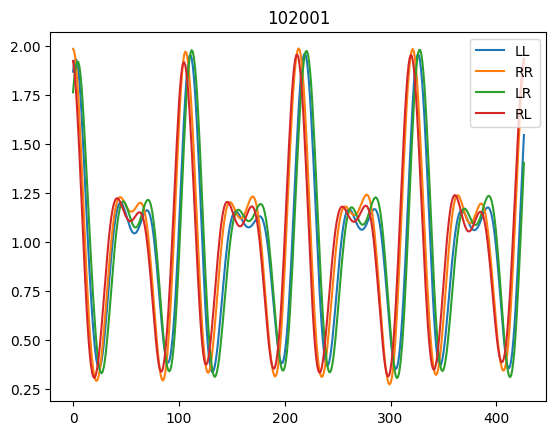

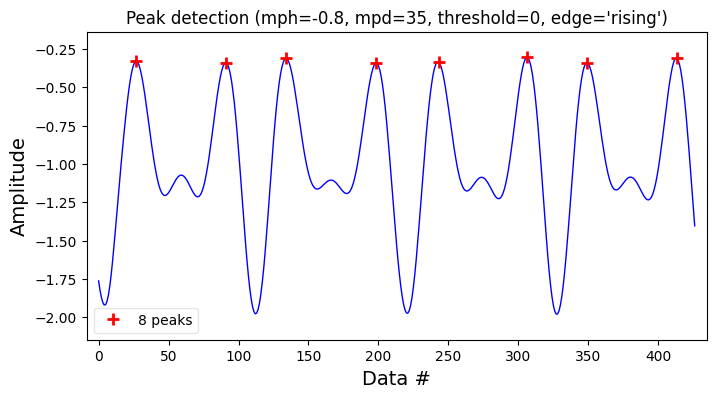

left 下面積1為： 58.84694870221574
left 下面積2為： 47.87171059576688
left 下面積3為： 57.84441428619606
left 下面積4為： 50.093449851515906
left 下面積5為： 57.986382834782894
left 下面積6為： 47.94845542284285
left 下面積7為： 58.6581942904431
第一次數據NCC曲線下面積(LR)： [58.84694870221574, 47.87171059576688, 57.84441428619606, 50.093449851515906, 57.986382834782894, 47.94845542284285, 58.6581942904431]


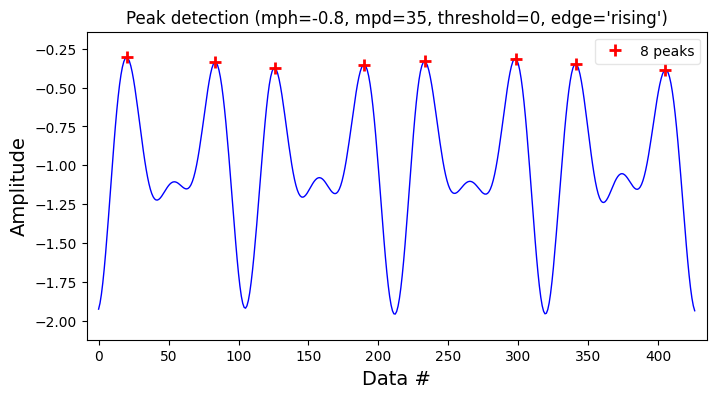

left 下面積1為： 57.84661617911553
left 下面積2為： 47.442568668177785
left 下面積3為： 57.26607598001564
left 下面積4為： 47.948436014063816
left 下面積5為： 59.29924350819512
left 下面積6為： 47.093448136163985
left 下面積7為： 58.63491980851645
第一次數據NCC曲線下面積(LR)： [57.84661617911553, 47.442568668177785, 57.26607598001564, 47.948436014063816, 59.29924350819512, 47.093448136163985, 58.63491980851645]
./c.台南立人里/投稿版本_data/高衰//102002.json
try_peak= [ 300  411  526  634  741  849  958 1065 1176]
try_peak= [ 356  472  580  689  795  904 1013 1121 1241]
length： 433


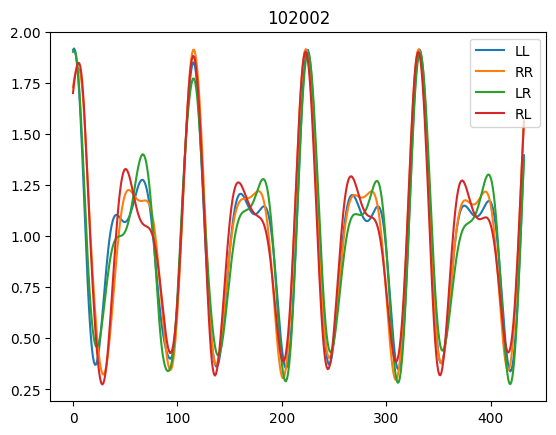

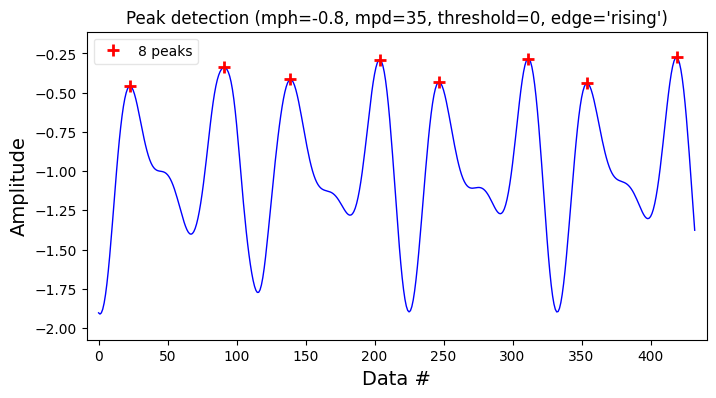

left 下面積1為： 63.31289301823501
left 下面積2為： 49.539530025897946
left 下面積3為： 59.67025390797349
left 下面積4為： 47.18306923809513
left 下面積5為： 59.44625210187166
left 下面積6為： 46.733661066934275
left 下面積7為： 59.4866760888576
第一次數據NCC曲線下面積(LR)： [63.31289301823501, 49.539530025897946, 59.67025390797349, 47.18306923809513, 59.44625210187166, 46.733661066934275, 59.4866760888576]


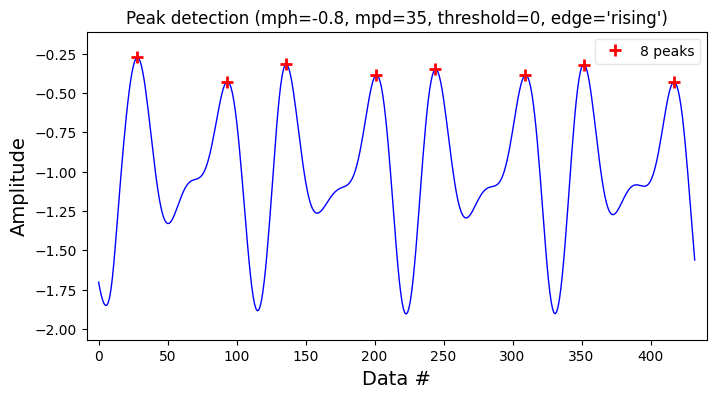

left 下面積1為： 61.474969823308186
left 下面積2為： 47.4959667684073
left 下面積3為： 59.98224915350794
left 下面積4為： 46.696540254009456
left 下面積5為： 60.13099090904444
left 下面積6為： 46.40353971520248
left 下面積7為： 59.77732574317312
第一次數據NCC曲線下面積(LR)： [61.474969823308186, 47.4959667684073, 59.98224915350794, 46.696540254009456, 60.13099090904444, 46.40353971520248, 59.77732574317312]
./c.台南立人里/投稿版本_data/高衰//102004.json
try_peak= [ 272  371  465  556  649  738  829  923 1014 1111]
try_peak= [ 320  415  509  601  692  783  874  969 1058]
length： 365


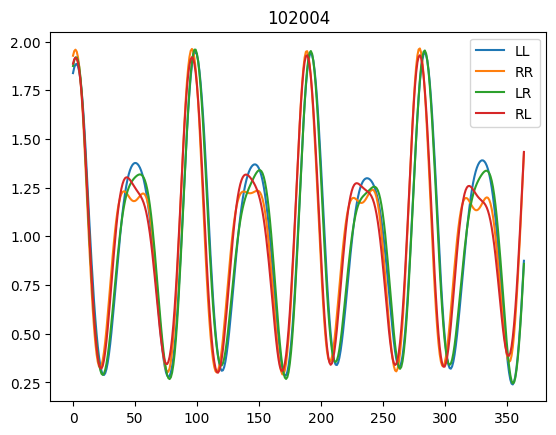

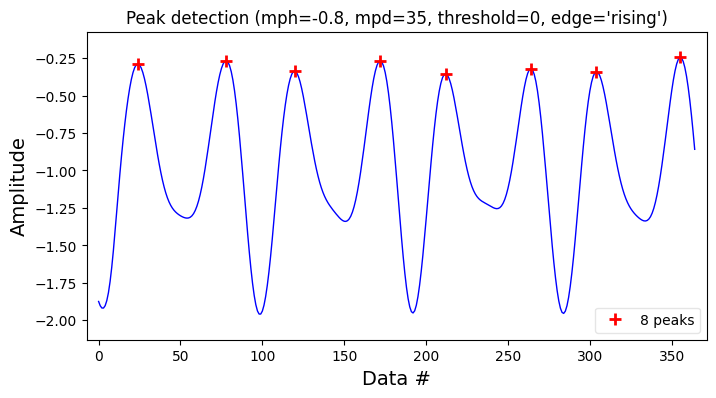

left 下面積1為： 48.22927545741369
left 下面積2為： 45.60608781620122
left 下面積3為： 47.62976131057441
left 下面積4為： 43.46991132469034
left 下面積5為： 46.97259213814904
left 下面積6為： 44.5573493124764
left 下面積7為： 46.64582367868944
第一次數據NCC曲線下面積(LR)： [48.22927545741369, 45.60608781620122, 47.62976131057441, 43.46991132469034, 46.97259213814904, 44.5573493124764, 46.64582367868944]


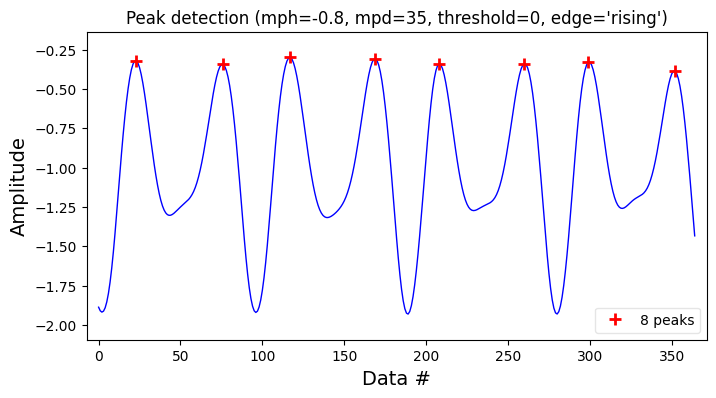

left 下面積1為： 47.93590823039636
left 下面積2為： 45.027730818668736
left 下面積3為： 47.72241941127807
left 下面積4為： 42.627223148965584
left 下面積5為： 46.939602577146914
left 下面積6為： 43.73251949546194
left 下面積7為： 47.73565979889382
第一次數據NCC曲線下面積(LR)： [47.93590823039636, 45.027730818668736, 47.72241941127807, 42.627223148965584, 46.939602577146914, 43.73251949546194, 47.73565979889382]
./c.台南立人里/投稿版本_data/高衰//102720.json
try_peak= [165 258 340 423 513 606 699]
try_peak= [218 302 386 472 562 654 752]
length： 344


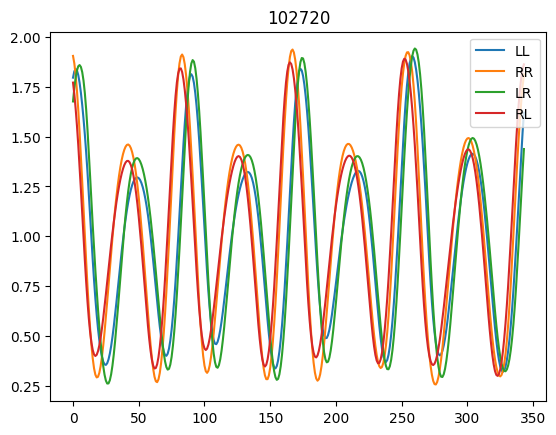

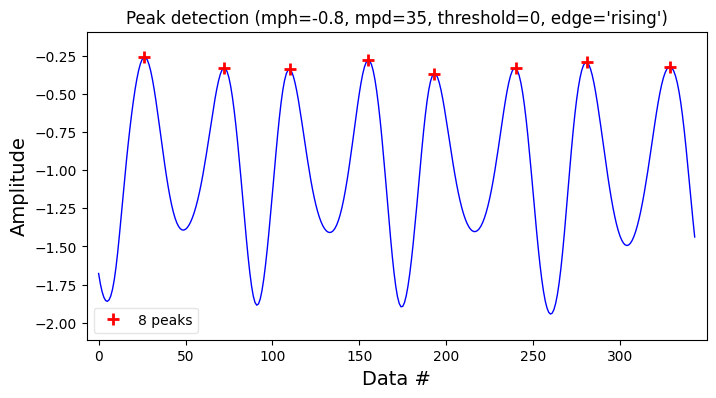

left 下面積1為： 41.12539288270428
left 下面積2為： 40.423477133386214
left 下面積3為： 41.88323190302245
left 下面積4為： 41.16265979882477
left 下面積5為： 43.610741396662576
left 下面積6為： 45.59118552659719
left 下面積7為： 44.875385572143315
第一次數據NCC曲線下面積(LR)： [41.12539288270428, 40.423477133386214, 41.88323190302245, 41.16265979882477, 43.610741396662576, 45.59118552659719, 44.875385572143315]


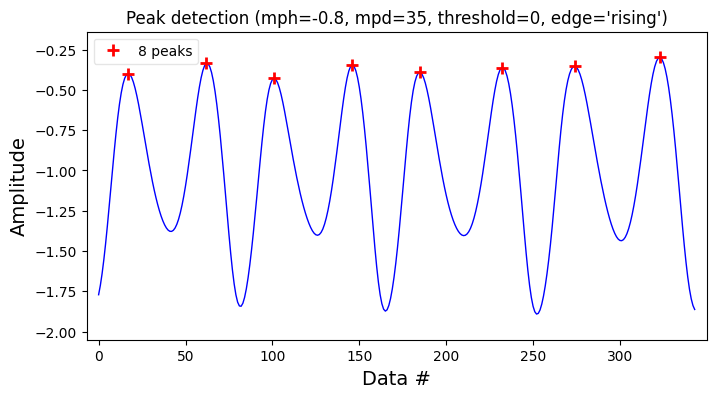

left 下面積1為： 39.19877478288994
left 下面積2為： 40.104290120609825
left 下面積3為： 42.018142912760105
left 下面積4為： 40.180851035602046
left 下面積5為： 44.283508999445516
left 下面積6為： 46.03468505336486
left 下面積7為： 45.23164727522878
第一次數據NCC曲線下面積(LR)： [39.19877478288994, 40.104290120609825, 42.018142912760105, 40.180851035602046, 44.283508999445516, 46.03468505336486, 45.23164727522878]
./c.台南立人里/投稿版本_data/高衰//102722.json
try_peak= [215 308 396 484 571 657 744 834]
try_peak= [262 350 439 528 614 699 788 876]
length： 345


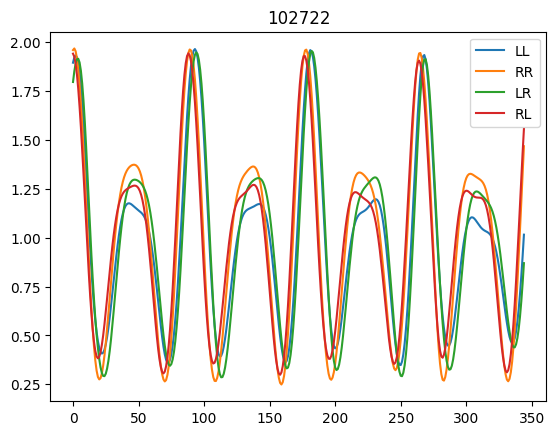

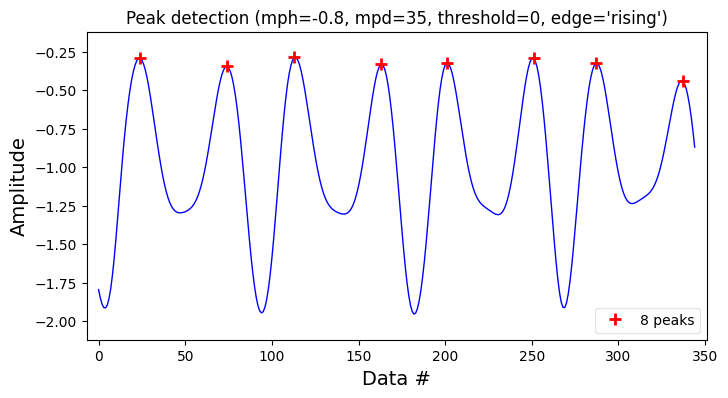

left 下面積1為： 45.24026156480198
left 下面積2為： 43.32608928351541
left 下面積3為： 45.481848083688604
left 下面積4為： 42.45520320497506
left 下面積5為： 45.6585555603581
left 下面積6為： 38.37887582451337
left 下面積7為： 44.42156625603085
第一次數據NCC曲線下面積(LR)： [45.24026156480198, 43.32608928351541, 45.481848083688604, 42.45520320497506, 45.6585555603581, 38.37887582451337, 44.42156625603085]


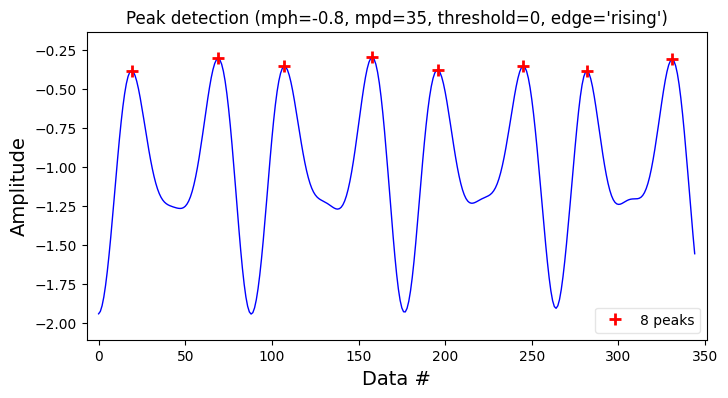

left 下面積1為： 44.740896493636015
left 下面積2為： 42.37913492230063
left 下面積3為： 45.687567650104256
left 下面積4為： 42.114622468287834
left 下面積5為： 45.17398693367282
left 下面積6為： 38.31814023871722
left 下面積7為： 43.26802381689057
第一次數據NCC曲線下面積(LR)： [44.740896493636015, 42.37913492230063, 45.687567650104256, 42.114622468287834, 45.17398693367282, 38.31814023871722, 43.26802381689057]
./c.台南立人里/投稿版本_data/高衰//110325.json
try_peak= [324 436 546 656 767 880]
try_peak= [373 487 596 702 819 933]
length： 440


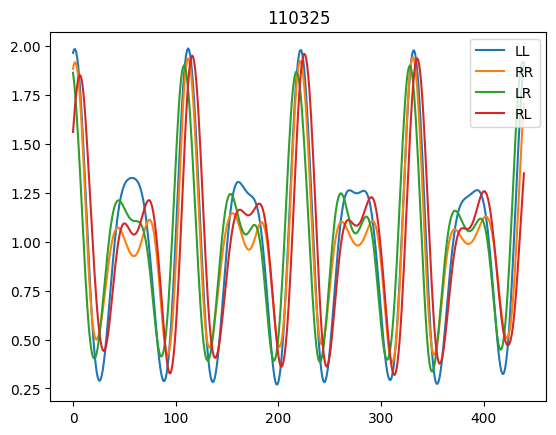

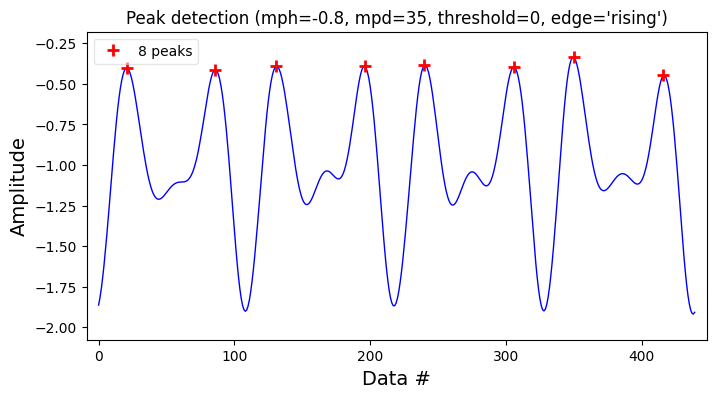

left 下面積1為： 59.53125556060917
left 下面積2為： 50.099942281648445
left 下面積3為： 58.98953261333378
left 下面積4為： 49.42478387430454
left 下面積5為： 60.72038205470696
left 下面積6為： 48.16000121538282
left 下面積7為： 60.3255346870367
第一次數據NCC曲線下面積(LR)： [59.53125556060917, 50.099942281648445, 58.98953261333378, 49.42478387430454, 60.72038205470696, 48.16000121538282, 60.3255346870367]


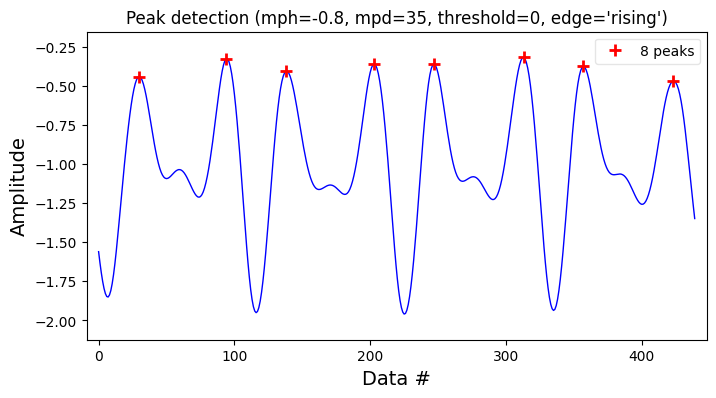

left 下面積1為： 58.7063590868833
left 下面積2為： 48.88238024932989
left 下面積3為： 59.03197658994542
left 下面積4為： 48.88684076040643
left 下面積5為： 60.68644087243461
left 下面積6為： 47.52011113022829
left 下面積7為： 60.751236936888645
第一次數據NCC曲線下面積(LR)： [58.7063590868833, 48.88238024932989, 59.03197658994542, 48.88684076040643, 60.68644087243461, 47.52011113022829, 60.751236936888645]
./c.台南立人里/投稿版本_data/高衰//111006.json
try_peak= [ 164  364  567  762  967 1150 1339 1538 1731 1919 2110]
try_peak= [ 262  465  677  862 1058 1251 1439 1638 1828 2023 2210]
length： 754


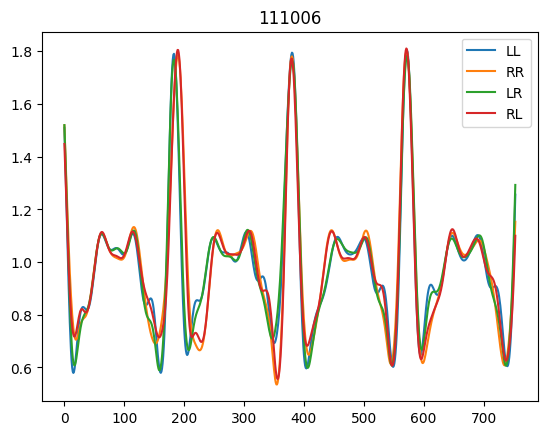

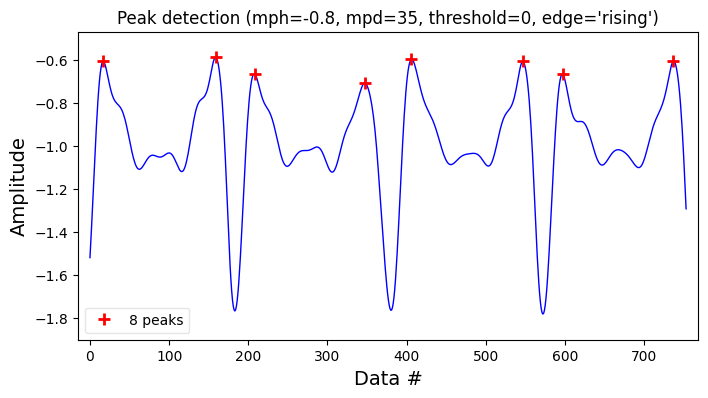

left 下面積1為： 131.76047988515222
left 下面積2為： 55.43755211238063
left 下面積3為： 132.50535458293285
left 下面積4為： 67.61642674759015
left 下面積5為： 130.44941642003408
left 下面積6為： 57.73746195338145
left 下面積7為： 131.7040751096893
第一次數據NCC曲線下面積(LR)： [131.76047988515222, 55.43755211238063, 132.50535458293285, 67.61642674759015, 130.44941642003408, 57.73746195338145, 131.7040751096893]


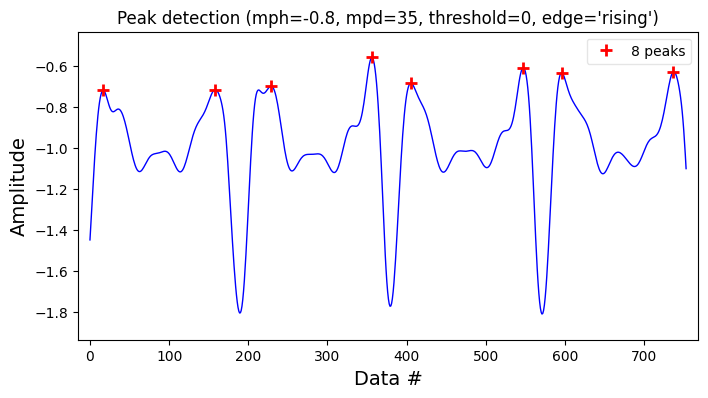

left 下面積1為： 131.1669911131075
left 下面積2為： 72.06638543548124
left 下面積3為： 122.87521173868605
left 下面積4為： 60.31842898907317
left 下面積5為： 131.0500035241103
left 下面積6為： 57.06441690961687
left 下面積7為： 132.3725724183558
第一次數據NCC曲線下面積(LR)： [131.1669911131075, 72.06638543548124, 122.87521173868605, 60.31842898907317, 131.0500035241103, 57.06441690961687, 132.3725724183558]


In [170]:
row_path = './c.台南立人里/投稿版本_data/高衰/'
all_file_name = os.listdir(row_path)
hight_RR_mean = []
hight_RR_std = []
hight_LL_mean = []
hight_LL_std = []
hight_RL_mean = []
hight_RL_std = []
hight_LR_mean = []
hight_LR_std = []
hight_cadence = []
hight_GCI = []
for _ in all_file_name:
    name = _.split('.')[0]
    path = f'{row_path}/{_}'
    print(path)
    with open(path) as file:
        once_data = json.load(file)
    once_data['LeftFootGyro']['z'] = savgol_filter(once_data['LeftFootGyro']['z'], 11, 3)
    #Left
    x = detect_peaks(once_data['LeftFootGyro']['z'][0:6000],mpd = 80 )
    a=[]
    for i in x:
        a.append(once_data['LeftFootGyro']['z'][i]) 
    # print(statistics.mean(a))
    try_peak = detect_peaks(once_data['LeftFootGyro']['z'][0:6000],mph = statistics.mean(a)-25,mpd = 60 ,kpsh=True) #,show=True
    # try_peak = try_peak[1::]    #略過第一步
    print('try_peak=',try_peak)
    once_Left_five_steps=[]
    for i in range(len(try_peak)):
        if try_peak[i+1]-try_peak[i] < 200: once_Left_five_steps.append(try_peak[i])
        if try_peak[i+1]-try_peak[i] >= 200 and len(once_Left_five_steps)<5:once_Left_five_steps=[]
        if len(once_Left_five_steps)==5: once_Left_five_steps.append(try_peak[i+1]);break 
    L_cad = (len(try_peak)-1)/((try_peak[-1]-try_peak[0])/100)*60
    L_GCI = np.mean(np.diff(try_peak))
    #Right
    once_data['RightFootGyro']['z'] = np.array(once_data['RightFootGyro']['z']) * (-1)
    once_data['RightFootGyro']['z'] = savgol_filter(once_data['RightFootGyro']['z'], 11, 3)
    x = detect_peaks(once_data['RightFootGyro']['z'][0:6000],mpd = 80 )
    a=[]
    for i in x:
        a.append(once_data['RightFootGyro']['z'][i]) 
    # print(statistics.mean(a))
    try_peak = detect_peaks(once_data['RightFootGyro']['z'][0:6000],mph = statistics.mean(a)-30,mpd = 60 ,kpsh=True) #,show=True
    # try_peak = try_peak[1::]    #略過第一步
    print('try_peak=',try_peak)
    once_Right_five_steps=[]
    for i in range(len(try_peak)):
        if try_peak[i+1]-try_peak[i] < 200: once_Right_five_steps.append(try_peak[i])
        if try_peak[i+1]-try_peak[i] >= 200 and len(once_Right_five_steps)<5:once_Right_five_steps=[]
        if len(once_Right_five_steps)==5: once_Right_five_steps.append(try_peak[i+1]);break 
    R_cad = (len(try_peak)-1)/((try_peak[-1]-try_peak[0])/100)*60
    R_GCI = np.mean(np.diff(try_peak))
    hight_cadence.append((L_cad+R_cad) / 2)
    hight_GCI.append((L_GCI+R_GCI)/2)
    #Left x,y,z filtering
    once_left_acc_fft_x = low_pass_filter(once_data['LeftFootAcc']['x'],3.3,80,4)
    once_left_acc_fft_y = low_pass_filter(once_data['LeftFootAcc']['y'],3.3,80,4)
    once_left_acc_fft_z = low_pass_filter(once_data['LeftFootAcc']['z'],3.3,80,4)
    #Right x,y,z filtering
    once_right_acc_fft_x = low_pass_filter(once_data['RightFootAcc']['x'],3.3,80,4)
    once_right_acc_fft_y = low_pass_filter(once_data['RightFootAcc']['y'],3.3,80,4)
    once_right_acc_fft_z = low_pass_filter(once_data['RightFootAcc']['z'],3.3,80,4)

    #訊號倒置
    once_left_acc_fft_x = np.array(once_left_acc_fft_x) * (-1)    
    once_left_acc_fft_y = np.array(once_left_acc_fft_y) * (-1)  
    once_left_acc_fft_z = np.array(once_left_acc_fft_z) * (-1)
    #RSS
    once_left_rss = np.sqrt(np.array(once_left_acc_fft_x)**2 + np.array(once_left_acc_fft_y)**2 + np.array(once_left_acc_fft_z)**2)
    once_right_rss = np.sqrt(np.array(once_right_acc_fft_x)**2 + np.array(once_right_acc_fft_y)**2 + np.array(once_right_acc_fft_z)**2)

    #left five steps
    left_five = once_left_rss[once_Left_five_steps[0]:once_Left_five_steps[-1]]
    left_t1 = once_left_rss[once_Left_five_steps[0]:once_Left_five_steps[1]]
    left_t2 = once_left_rss[once_Left_five_steps[1]:once_Left_five_steps[2]]
    left_t3 = once_left_rss[once_Left_five_steps[2]:once_Left_five_steps[3]]
    left_t4 = once_left_rss[once_Left_five_steps[3]:once_Left_five_steps[4]]
    left_t5 = once_left_rss[once_Left_five_steps[4]:once_Left_five_steps[5]]

    #right five steps
    right_five = once_right_rss[once_Right_five_steps[0]:once_Right_five_steps[-1]]    
    right_t1 = once_right_rss[once_Right_five_steps[0]:once_Right_five_steps[1]]
    right_t2 = once_right_rss[once_Right_five_steps[1]:once_Right_five_steps[2]]
    right_t3 = once_right_rss[once_Right_five_steps[2]:once_Right_five_steps[3]]
    right_t4 = once_right_rss[once_Right_five_steps[3]:once_Right_five_steps[4]]
    right_t5 = once_right_rss[once_Right_five_steps[4]:once_Right_five_steps[5]]

    once_left_five = left_five
    once_right_five = right_five    

    #left NCC(CrossCorrelation)
    length = []
    limit_length = 0    #取極限資料長度
    for i in range(5):
        a = NormaliseCrossCorrelation(once_left_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
        b = NormaliseCrossCorrelation(once_right_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
        c = NormaliseCrossCorrelation(once_left_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
        d = NormaliseCrossCorrelation(once_right_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
        length.append(len(a))
        length.append(len(b))
        length.append(len(c))
        length.append(len(d))
    limit_length = min(length)
    print('length：',limit_length)

    #LL
    LL = []
    for i in range(5):
        LL_a = NormaliseCrossCorrelation(once_left_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
        LL.append(LL_a[0:limit_length])
    LL_mean = np.mean(LL, axis=0)
    hight_LL_mean.append(np.mean(LL_mean))
    hight_LL_std.append(np.std(LL_mean))

    #RR
    RR = []
    for i in range(5):
        RR_a = NormaliseCrossCorrelation(once_right_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
        RR.append(RR_a[0:limit_length])
    RR_mean = np.mean(RR, axis=0)
    hight_RR_mean.append(np.mean(RR_mean))
    hight_RR_std.append(np.std(RR_mean))

    #LR
    LR = []
    for i in range(5):
        LR_a = NormaliseCrossCorrelation(once_left_five,once_right_rss[once_Right_five_steps[i]:once_Right_five_steps[i+1]])
        LR.append(LR_a[0:limit_length])
    LR_mean = np.mean(LR, axis=0)
    hight_LR_mean.append(np.mean(LR_mean))
    hight_LR_std.append(np.std(LR_mean))

    #RL
    RL = []
    for i in range(5):
        RL_a = NormaliseCrossCorrelation(once_right_five,once_left_rss[once_Left_five_steps[i]:once_Left_five_steps[i+1]])
        RL.append(RL_a[0:limit_length])
    RL_mean = np.mean(RL, axis=0)
    hight_RL_mean.append(np.mean(RL_mean))
    hight_RL_std.append(np.std(RL_mean))

    plt.plot(LL_mean,label='LL')
    plt.plot(RR_mean,label='RR')
    plt.plot(LR_mean,label='LR')
    plt.plot(RL_mean,label='RL')
    plt.title(f'{name}')
    plt.legend()
    plt.show()

    #LR 曲線下面積
    y = detect_peaks(LR_mean*(-1),mpd = 35,mph=-0.8,show=True)
    LR_area=[]
    for _ in range(len(y)):
        try:
            x_a=np.arange(y[_],y[_+1],1)
            y_a=LR_mean[y[_]:y[_+1]]
            area = integrate.trapz(y_a, x_a)
            print(f'left 下面積{_+1}為：', area)
            LR_area.append(abs(area))
        except:break
    print('第一次數據NCC曲線下面積(LR)：',LR_area)

    #RL 曲線下面積
    y = detect_peaks(RL_mean*(-1),mpd = 35,mph=-0.8,show=True)
    RL_area=[]
    for _ in range(len(y)):
        try:
            x_a=np.arange(y[_],y[_+1],1)
            y_a=LR_mean[y[_]:y[_+1]]
            area = integrate.trapz(y_a, x_a)
            print(f'left 下面積{_+1}為：', area)
            RL_area.append(abs(area))
        except:break
    print('第一次數據NCC曲線下面積(LR)：',RL_area)

    #(前)Left
    once_left_area = []
    if isinstance(LR_area[0],float) is True:LR_area.insert(0,'LR NCC面積序列')
    if isinstance(RL_area[0],float) is True:RL_area.insert(0,'RL NCC面積序列')
    with open (f'{row_path}/NCC.csv','a') as f:
        writer = csv.writer(f)
        writer.writerow(LR_area)
        writer.writerow(RL_area)

In [151]:
import scipy.stats as stats
# print(low_RR_mean)
# ttest_ind(low_RR_mean, hight_RR_mean)
print('RR')
print(stats.ttest_ind(low_RR_mean, hight_RR_mean, equal_var=False))
print(stats.ttest_ind(low_RR_std, hight_RR_std, equal_var=False))
print('LL')
print(stats.ttest_ind(low_LL_mean, hight_LL_mean, equal_var=False))
print(stats.ttest_ind(low_LL_std, hight_LL_std, equal_var=False))
print('RL')
print(stats.ttest_ind(low_RL_mean, hight_RL_mean, equal_var=False))
print(stats.ttest_ind(low_RL_std, hight_RL_std, equal_var=False))
print('LR')
print(stats.ttest_ind(low_LR_mean, hight_LR_mean, equal_var=False))
print(stats.ttest_ind(low_LR_std, hight_LR_std, equal_var=False))
print(f'Cadence：{stats.ttest_ind(low_cadence, hight_cadence, equal_var=False)}')
print(f'GCI：{stats.ttest_ind(low_GCI, hight_GCI, equal_var=False)}')



RR
Ttest_indResult(statistic=-1.1869746844020106, pvalue=0.25851952746875534)
Ttest_indResult(statistic=1.5170447162036014, pvalue=0.17218358245296692)
LL
Ttest_indResult(statistic=0.6065643410315356, pvalue=0.5603577072933154)
Ttest_indResult(statistic=1.5795686974398644, pvalue=0.15254967556459778)
RL
Ttest_indResult(statistic=-0.6095944759692541, pvalue=0.5520222781656737)
Ttest_indResult(statistic=2.0887431303431794, pvalue=0.06799282316949413)
LR
Ttest_indResult(statistic=0.08387173761762183, pvalue=0.9350684728481313)
Ttest_indResult(statistic=1.3709902909949019, pvalue=0.21061962749942928)
Cadence：Ttest_indResult(statistic=1.334234659615962, pvalue=0.22329273088582466)
GCI：Ttest_indResult(statistic=-1.2472029343370064, pvalue=0.2567880427431875)
[108.33333333333334, 110.0625, 92.73611111111111, 89.0, 88.07142857142857, 111.6, 194.7]


In [142]:
row_path = './c.台南立人里/投稿版本_data/低衰/'
all_file_name = os.listdir(row_path)
for _ in all_file_name:
    name = _.split('.')[0]
    path = f'{row_path}/{_}'
    print(path)
    with open(path) as file:
        once_data = json.load(file)
    once_data['LeftFootGyro']['z'] = savgol_filter(once_data['LeftFootGyro']['z'], 11, 3)
    #Left
    x = detect_peaks(once_data['LeftFootGyro']['z'][0:6000],mpd = 80 )
    a=[]
    for i in x:
        a.append(once_data['LeftFootGyro']['z'][i]) 
    # print(statistics.mean(a))
    try_peak = detect_peaks(once_data['LeftFootGyro']['z'][0:6000],mph = statistics.mean(a)-25,mpd = 60 ,kpsh=True) #,show=True
    # try_peak = try_peak[1::]    #略過第一步
    print('try_peak=',try_peak)
    once_Left_five_steps=[]
    for i in range(len(try_peak)):
        if try_peak[i+1]-try_peak[i] < 200: once_Left_five_steps.append(try_peak[i])
        if try_peak[i+1]-try_peak[i] >= 200 and len(once_Left_five_steps)<5:once_Left_five_steps=[]
        if len(once_Left_five_steps)==5: once_Left_five_steps.append(try_peak[i+1]);break
    L_cad = (len(try_peak)-1)/((try_peak[-1]-try_peak[0])/100)*60
    print(f'{(len(try_peak)-1)/((try_peak[-1]-try_peak[0])/100)*60}')

./c.台南立人里/投稿版本_data/低衰//102003.json
try_peak= [277 371 465 559 650 741 833 924]
64.91499227202473
./c.台南立人里/投稿版本_data/低衰//102005.json
try_peak= [109 202 296 387 479 573 668]
64.40071556350625
./c.台南立人里/投稿版本_data/低衰//102007.json
try_peak= [271 362 452 539 630 724 820]
65.57377049180327
./c.台南立人里/投稿版本_data/低衰//102009.json
try_peak= [303 415 532 642 751 864 975]
53.57142857142858
./c.台南立人里/投稿版本_data/低衰//102013.json
try_peak= [ 260  371  475  580  683  788  892 1002]
56.60377358490566
./c.台南立人里/投稿版本_data/低衰//102714.json
try_peak= [264 362 456 548 641 735 832]
63.380281690140855
./c.台南立人里/投稿版本_data/低衰//102715.json
try_peak= [272 371 471 574 675 782]
58.82352941176471
./c.台南立人里/投稿版本_data/低衰//102716.json
try_peak= [280 378 473 567 668 767]
61.60164271047228
./c.台南立人里/投稿版本_data/低衰//102717.json
try_peak= [175 285 382 477 574 670]
60.60606060606061
./c.台南立人里/投稿版本_data/低衰//102718.json
try_peak= [283 371 457 544 633 722 808 902]
67.85137318255249
./c.台南立人里/投稿版本_data/低衰//102719.json
try_peak= [238 